# UpData - História legal, agora me mostre os dados! 🥑
Somos a UpData e começamos nossa jornada fornecendo consultoria de empresas e implementando a cultura 
data driven criando assim métricas que melhoram o marketing e faturamento da empresa.
 
Hoje, estamos trabalhando com uma empresa chamada 'WeAvocado', uma empresa grande que existe desde 2015 e em
2018 nos aliamos para fornecemos nosssos serviços, tendo em vista o decrescente faturamento da empresa.

In [0]:
#Importando a tabela
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, date, time
from sklearn.preprocessing import MinMaxScaler

df = spark.read.csv("/FileStore/tables/avocado.csv", header=True, sep=",")
df = df.toPandas()
df.head()

,_c0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.7,109149.67,130.5,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.0,71976.41,72.58,5811.16,5677.4,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.6,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [0]:
#Formatar colunas e tratar dados
df.rename(columns={'_c0': 'index'}, inplace = True)
print(df.shape)
df = df[df['region'] != 'TotalUS']
print(df.shape)

(18249, 14)
(17911, 14)


In [0]:
df.sort_values('Date', inplace=True)
df['Date'] = df['Date'].astype('datetime64[ns]')
df['Month'] = df['Date'].dt.month

# fazer o casting para float
df['Total Volume'] = df['Total Volume'].astype(float)
df['AveragePrice'] = df['AveragePrice'].astype(float)

# Tratamento dos dados para variáveis                                               
quantidade_vendida_por_ano = round(df.groupby(['year','Month']).sum().filter(['Total Volume'])/1000000, 2)
media_preco_por_tipo_ao_longo_do_tempo = df.groupby(['year','Month', 'type']).mean().filter(['AveragePrice'])
preco_maximo_por_tipo_ao_longo_do_tempo = df.groupby(['year','Month', 'type']).max().filter(['AveragePrice'])
preco_minimo_por_tipo_ao_longo_do_tempo = df.groupby(['year','Month', 'type']).min().filter(['AveragePrice'])

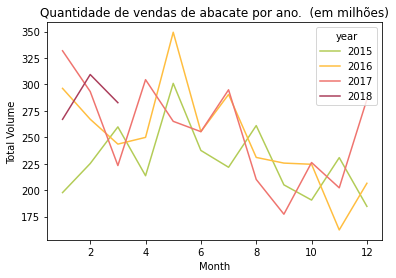

In [0]:
sns.lineplot(data=quantidade_vendida_por_ano.reset_index(), x='Month', y='Total Volume', hue='year', palette=['#B3CC57','#FFBE40', '#EF746F', '#AB3E5B']).set_title('Quantidade de vendas de abacate por ano.  (em milhões)');

Percebe-se que nos meses de Abril e Maio, há uma demanda maior que no restante do ano.
Já em meses mais frios, como de agosto à novembro, a demanda é a menor do ano.

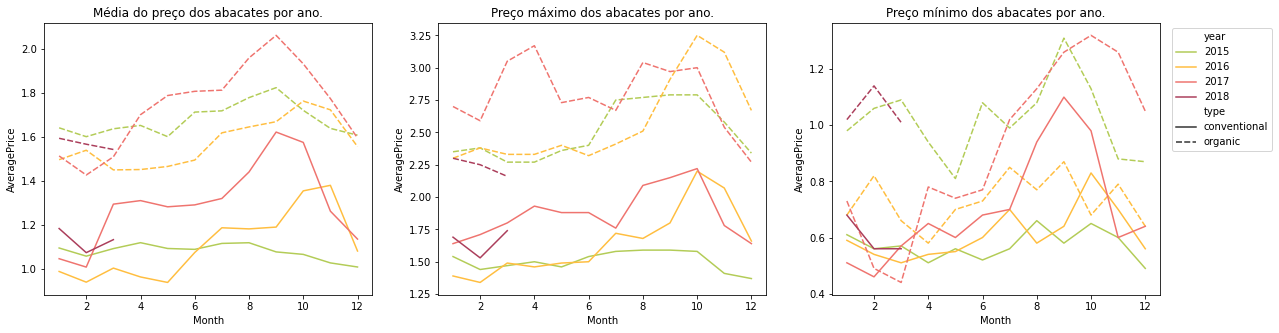

In [0]:
fig, axis = plt.subplots(1,3, figsize=(20,5))

sns.lineplot(data=media_preco_por_tipo_ao_longo_do_tempo.reset_index(),ax=axis[0], legend=False, x='Month', y='AveragePrice', hue='year', style='type', palette=['#B3CC57','#FFBE40', '#EF746F', '#AB3E5B']);
axis[0].set_title('Média do preço dos abacates por ano.')

sns.lineplot(data=preco_maximo_por_tipo_ao_longo_do_tempo.reset_index(),ax=axis[1], legend=False, x='Month', y='AveragePrice', hue='year', style='type', palette=['#B3CC57','#FFBE40', '#EF746F', '#AB3E5B']);
axis[1].set_title('Preço máximo dos abacates por ano.')

sns.lineplot(data=preco_minimo_por_tipo_ao_longo_do_tempo.reset_index(), ax=axis[2], x='Month', y='AveragePrice', hue='year', style='type', palette=['#B3CC57','#FFBE40', '#EF746F', '#AB3E5B']);
axis[2].set_title('Preço mínimo dos abacates por ano.')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left');

In [0]:
df1 = df[['Date', 'AveragePrice', 'Total Volume', 'region']]

df1['AveragePrice'] = df1[['AveragePrice']].astype(float)
df1['AveragePrice'] = df1[['AveragePrice']].astype(int)
df1['Total Volume'] = df1[['Total Volume']].astype(float)
df1['Total Volume'] = df1[['Total Volume']].astype(int)
df1.head()

<command-1088644462631564>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['AveragePrice'] = df1[['AveragePrice']].astype(float)
<command-1088644462631564>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['AveragePrice'] = df1[['AveragePrice']].astype(int)
<command-1088644462631564>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,Date,AveragePrice,Total Volume,region
1091,2015-01-04,0,153506,Jacksonville
155,2015-01-04,1,788025,BaltimoreWashington
10737,2015-01-04,1,7301,NorthernNewEngland
1299,2015-01-04,0,540234,MiamiFtLauderdale
9749,2015-01-04,1,9895,DallasFtWorth


In [0]:
df2 = df1.groupby('region').sum().sort_values('Total Volume', ascending=0).head(10)
df2.sort_values('Total Volume', ascending=0).head(10)
df3 = (df2.sort_values('Total Volume', ascending=0) / 1000000).head(10)

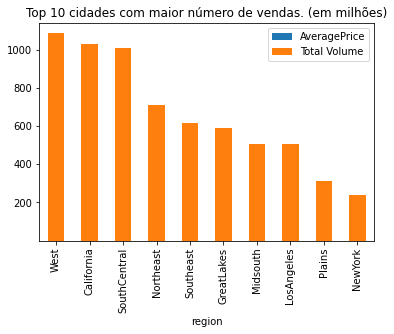

In [0]:
teste = df3.plot(kind='bar', stacked=1).set_title('Top 10 cidades com maior número de vendas. (em milhões)');
teste;

In [0]:
dfa = df[['Date', 'AveragePrice', 'Total Volume', 'region']]
dfa['AveragePrice'] = dfa[['AveragePrice']].astype(float)
dfa['Total Volume'] = dfa[['Total Volume']].astype(float)
dfb = dfa.groupby('region').mean().sort_values('AveragePrice', ascending=0).head(10)
dfb.head(10)

<command-1088644462631585>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['AveragePrice'] = dfa[['AveragePrice']].astype(float)
<command-1088644462631585>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['Total Volume'] = dfa[['Total Volume']].astype(float)


,AveragePrice,Total Volume
region,,
HartfordSpringfield,1.818639,1.499128e+05
SanFrancisco,1.804201,4.018645e+05
NewYork,1.727574,7.122311e+05
Philadelphia,1.632130,2.125408e+05
Sacramento,1.621568,2.223779e+05
Charlotte,1.606036,1.051939e+05
Northeast,1.601923,2.110299e+06
Albany,1.561036,4.753787e+04
Chicago,1.556775,3.955690e+05


In [0]:
dfb = dfa.groupby('region').mean().sort_values('AveragePrice', ascending=1).head(10)
dfb.head(10)

,AveragePrice,Total Volume
region,,
Houston,1.047929,6.010884e+05
DallasFtWorth,1.085592,6.166251e+05
SouthCentral,1.101243,2.991952e+06
CincinnatiDayton,1.209201,1.317219e+05
Nashville,1.212101,1.053612e+05
LosAngeles,1.216006,1.502653e+06
Denver,1.218580,4.109542e+05
PhoenixTucson,1.224438,5.788264e+05
Roanoke,1.247929,7.408879e+04


In [0]:
# Gerar métricas consolidadas das vendas por unidade e por caixas de abacate
#selecionar colunas
df2 = df.filter(['4046', '4225', '4770', 'year', 'Small Bags', 'Large Bags', 'XLarge Bags'])

#formatar dados
df2["year"] = df2["year"].astype(int)
df2["4046"] = df2["4046"].astype(float).round().astype(int)
df2["4225"] = df2["4225"].astype(float).round().astype(int)
df2["4770"] = df2["4770"].astype(float).round().astype(int)
df2["Small Bags"] = df2["Small Bags"].astype(float).round().astype(int)
df2["Large Bags"] = df2["Large Bags"].astype(float).round().astype(int)
df2["XLarge Bags"] = df2["XLarge Bags"].astype(float).round().astype(int)

#Salvar métricas
df2 = df2.groupby('year').agg(
    Pequeno=('4046','mean'),
    Medio=('4225','mean'),
    Grande=('4770','mean'),
    SmallBags=('Small Bags','mean'),
    LargeBags=('Large Bags','mean'),
    XLargeBags=('XLarge Bags','mean')
    ).reset_index()
df2

,year,Pequeno,Medio,Grande,SmallBags,LargeBags,XLargeBags
0,2015,191896.594447,199576.397387,16179.097260,71902.295591,14880.026311,614.295046
1,2016,169843.284289,189965.652576,18042.963171,126205.737663,38253.261067,2270.136792
2,2017,180851.307514,172311.297009,10258.448540,136205.742343,44299.216524,2654.619836
3,2018,222323.272799,201735.578616,11320.673742,176476.845126,60056.014937,3480.517296


Padronizar valores para visualiza-los melhor

In [0]:
#formatar dados para reduzi-los a uma escola que facilite o entendimento
df2["year"] = df2["year"].astype(int)
df2["Pequeno"] = round(df2["Pequeno"]/1000).astype(int)
df2["Medio"] = round(df2["Medio"]/1000).astype(int)
df2["Grande"] = round(df2["Grande"]/1000).astype(int)
df2["SmallBags"] = round(df2["SmallBags"]/1000).astype(int)
df2["LargeBags"] = round(df2["LargeBags"]/1000).astype(int)
df2["XLargeBags"] = round(df2["XLargeBags"]/1000).astype(int)

df2["Total"] = df2["Pequeno"] + df2["Medio"]
df2

,year,Pequeno,Medio,Grande,SmallBags,LargeBags,XLargeBags,Total
0,2015,192,200,16,72,15,1,392
1,2016,170,190,18,126,38,2,360
2,2017,181,172,10,136,44,3,353
3,2018,222,202,11,176,60,3,424


In [0]:
media_por_ano_e_classe["Ano"] = media_por_ano_e_classe["Ano"].astype(int)
media_por_ano_e_classe["Media"] = media_por_ano_e_classe["Media"].astype(float)

display(media_por_ano_e_classe)

Ano,Media,Classe
2015,192.0,Pequeno
2016,170.0,Pequeno
2017,181.0,Pequeno
2018,222.0,Pequeno
2015,200.0,Medio
2016,190.0,Medio
2017,172.0,Medio
2018,202.0,Medio
2015,16.0,Grande
2016,18.0,Grande


Criar base secundária a partir da transposição de 6 colunas para utiliza-las como classes

In [0]:
#Transpor 6 colunas para utiliza-las como classes
COLUNAS = ['Ano','Media','Classe']
media_por_ano_e_classe = pd.DataFrame(columns=COLUNAS)

def adicionar(classe, inicia):
    novaBase = df2.filter(['year', classe])
    novaBase["Classe"] = classe
    
    for i, infos in novaBase.iterrows():
        media_por_ano_e_classe.loc[inicia] = [infos[0], infos[1], infos[2]]
        inicia += 1
    
adicionar("Pequeno", 0)
adicionar("Medio", 4)
adicionar("Grande", 8)
adicionar("SmallBags", 12)
adicionar("LargeBags", 16)
adicionar("XLargeBags", 20)


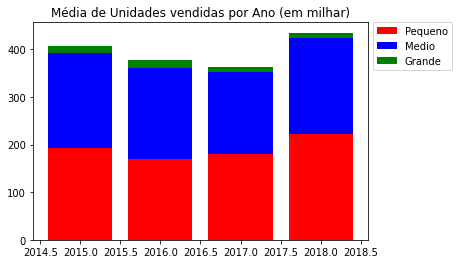

In [0]:
#Vendas de unidade por ano
x_unidades_por_ano = df2['year']
y1_unidades_por_ano = df2['Pequeno']
y2_unidades_por_ano = df2['Medio']
y3_unidades_por_ano = df2['Grande']

plt.bar(x_unidades_por_ano, y1_unidades_por_ano, color='r') 
plt.bar(x_unidades_por_ano, y2_unidades_por_ano, bottom=y1_unidades_por_ano, color='b') 
plt.bar(x_unidades_por_ano, y3_unidades_por_ano, bottom=y1_unidades_por_ano+y2_unidades_por_ano, color='g')
plt.title('Média de Unidades vendidas por Ano (em milhar)');
plt.legend(['Pequeno', 'Medio', 'Grande'], bbox_to_anchor=(1.25, 1),loc='upper right', borderaxespad=0);
plt.show() 

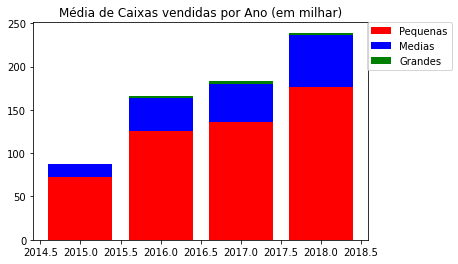

In [0]:
#Vendas de unidade por ano
x_caixas_por_ano = df2['year']
y1_caixas_por_ano = df2['SmallBags']
y2_caixas_por_ano = df2['LargeBags']
y3_caixas_por_ano = df2['XLargeBags']

plt.bar(x_caixas_por_ano, y1_caixas_por_ano, color='r') 
plt.bar(x_caixas_por_ano, y2_caixas_por_ano, bottom=y1_caixas_por_ano, color='b') 
plt.bar(x_caixas_por_ano, y3_caixas_por_ano, bottom=y1_caixas_por_ano+y2_caixas_por_ano, color='g')
plt.title('Média de Caixas vendidas por Ano (em milhar)');
plt.legend(['Pequenas', 'Medias', 'Grandes'], bbox_to_anchor=(1.25, 1),loc='upper right', borderaxespad=0);
plt.show() 

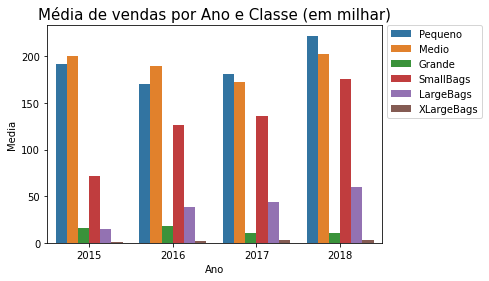

In [0]:
sns.barplot(data=media_por_ano_e_classe, x='Ano', y='Media', hue="Classe").set_title('Média de vendas por Ano e Classe (em milhar)', fontdict = { 'fontsize': 15});
plt.legend(bbox_to_anchor=(1.3, 1),loc='upper right', borderaxespad=0);

In [0]:
df1 = df
df1['Date'] = pd.to_datetime(df['Date'])
df1['Total Volume'] = df1['Total Volume'].astype(float)
df1['Total Volume'] = df1['Total Volume'].astype(int)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17911 entries, 1091 to 17733
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         17911 non-null  object        
 1   Date          17911 non-null  datetime64[ns]
 2   AveragePrice  17911 non-null  float64       
 3   Total Volume  17911 non-null  int64         
 4   4046          17911 non-null  object        
 5   4225          17911 non-null  object        
 6   4770          17911 non-null  object        
 7   Total Bags    17911 non-null  object        
 8   Small Bags    17911 non-null  object        
 9   Large Bags    17911 non-null  object        
 10  XLarge Bags   17911 non-null  object        
 11  type          17911 non-null  object        
 12  year          17911 non-null  object        
 13  region        17911 non-null  object        
 14  Month         17911 non-null  int64         
dtypes: datetime64[ns](1), float64(1),

In [0]:
df1_class_reg = df1.filter(['type','region','Total Volume'])
regions = df1_class_reg.sort_values('Total Volume', ascending=False).head(10)['region']
display(regions)

8419            West
5981      California
8557      California
9109            West
3166      California
9025    SouthCentral
5558            West
8048    SouthCentral
359       California
9018    SouthCentral
Name: region, dtype: object

In [0]:
df1_class_reg_10 = df1_class_reg[(df1_class_reg['region'] == 'West') | 
                                 (df1_class_reg['region'] == 'California') | 
                                 (df1_class_reg['region'] == 'SouthCentral') | 
                                 (df1_class_reg['region'] == 'Northeast') | 
                                 (df1_class_reg['region'] == 'Southeast') |
                                 (df1_class_reg['region'] == 'GreatLakes') |
                                 (df1_class_reg['region'] == 'LosAngeles') | 
                                 (df1_class_reg['region'] == 'Midsouth') | 
                                 (df1_class_reg['region'] == 'Plains') |
                                 (df1_class_reg['region'] == 'NewYork')]
df1_class_reg_10

,type,region,Total Volume
1351,conventional,Midsouth,2578275
10685,organic,Northeast,48280
10997,organic,Plains,34190
1507,conventional,NewYork,1402890
1559,conventional,Northeast,3759282
...,...,...,...
18153,organic,Southeast,121917
8814,conventional,NewYork,1774776
17901,organic,Midsouth,181040
18141,organic,SouthCentral,163496


In [0]:
df1_class_reg_10['Total_Milhoes']= df1_class_reg_10['Total Volume'].astype(float) / 1000000
df1_class_reg_10 = df1_class_reg_10.sort_values('Total_Milhoes', ascending=0)

<command-1088644462631574>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_class_reg_10['Total_Milhoes']= df1_class_reg_10['Total Volume'].astype(float) / 1000000


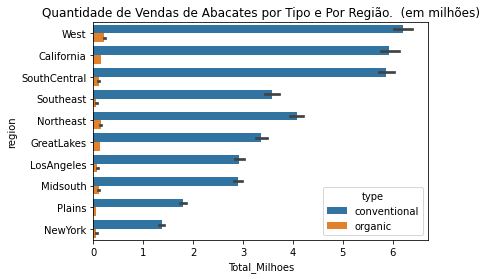

In [0]:
sns.barplot(data=df1_class_reg_10, x='Total_Milhoes', y='region',hue='type', orient='h').set_title('Quantidade de Vendas de Abacates por Tipo e Por Região.  (em milhões)');

In [0]:
df1_class_ano = df.filter(['Date','type','Total Volume'])
df1_class_ano['year'] = df1_class_ano['Date'].dt.year
df1_class_ano = df1_class_ano.groupby(['year','type']).sum().reset_index()
df1_class_ano['Total_Milhoes']= df1_class_ano['Total Volume'] / 1000000
df1_class_ano['Total_Milhoes'] = df1_class_ano['Total_Milhoes'].astype(int)
df1_class_ano

,year,type,Total Volume,Total_Milhoes
0,2015,conventional,2672911954,2672
1,2015,organic,55298742,55
2,2016,conventional,2919989074,2919
3,2016,organic,81738940,81
4,2017,conventional,2964394619,2964
5,2017,organic,105214834,105
6,2018,conventional,828699366,828
7,2018,organic,30406096,30


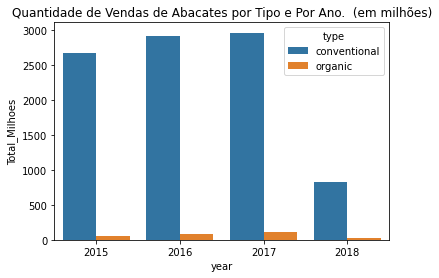

In [0]:
sns.barplot(data=df1_class_ano, x='year', y='Total_Milhoes',hue='type').set_title('Quantidade de Vendas de Abacates por Tipo e Por Ano.  (em milhões)');

Referências
https://www.kaggle.com/datasets/neuromusic/avocado-prices